In [ ]:
import pandas as pd

df1 = pd.read_csv("/content/kathmandu_air_quality_2020_2023.csv")
df2 = pd.read_csv("/content/kathmandu_air_quality_2023_2025.csv")

combined = pd.concat([df1, df2], ignore_index=True)

combined.to_csv("/content/combined.csv", index=False)

In [ ]:
combined = combined.drop_duplicates(keep='first')

In [ ]:
combined.to_csv("/content/combined.csv", index=False)

In [ ]:
# Load CSV
df = pd.read_csv("/content/combined.csv")

# Ensure datetime column is parsed as datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort by datetime
df = df.sort_values('datetime')

# Create a complete hourly time range from min to max
full_range = pd.date_range(start=df['datetime'].min(),
                           end=df['datetime'].max(),
                           freq='h')

# Find missing timestamps
missing = full_range.difference(df['datetime'])

print("Total missing hourly timestamps:", len(missing))
print("Missing timestamps:")
print(missing)

Total missing hourly timestamps: 696
Missing timestamps:
DatetimeIndex(['2021-01-27 01:00:00', '2021-01-27 02:00:00',
               '2021-01-27 03:00:00', '2021-01-27 04:00:00',
               '2021-01-27 05:00:00', '2021-01-27 06:00:00',
               '2021-01-27 07:00:00', '2021-01-27 08:00:00',
               '2021-01-27 09:00:00', '2021-01-27 10:00:00',
               ...
               '2025-04-19 15:00:00', '2025-04-19 16:00:00',
               '2025-04-19 17:00:00', '2025-04-19 18:00:00',
               '2025-04-19 19:00:00', '2025-04-19 20:00:00',
               '2025-04-19 21:00:00', '2025-04-19 22:00:00',
               '2025-04-19 23:00:00', '2025-04-20 00:00:00'],
              dtype='datetime64[ns]', length=696, freq=None)


In [ ]:
# Load CSV
df = pd.read_csv("/content/combined.csv")

# Parse datetime column
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort by datetime
df = df.sort_values('datetime')

# Create complete hourly datetime range
full_range = pd.date_range(start=df['datetime'].min(),
                           end=df['datetime'].max(),
                           freq='h')

# Reindex dataframe to include missing timestamps
df = df.set_index('datetime').reindex(full_range)

# Rename index back to datetime column
df.index.name = 'datetime'

# Interpolate all numeric columns (average of previous & next values)
df = df.interpolate(method='time')

# Save result
df.to_csv("/content/filled_missing_datetimes.csv")

In [ ]:
# Load CSV
df = pd.read_csv("/content/filled_missing_datetimes.csv")

# Ensure datetime column is parsed as datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# Sort by datetime
df = df.sort_values('datetime')

# Create a complete hourly time range from min to max
full_range = pd.date_range(start=df['datetime'].min(),
                           end=df['datetime'].max(),
                           freq='h')

# Find missing timestamps
missing = full_range.difference(df['datetime'])

print("Total missing hourly timestamps:", len(missing))
print("Missing timestamps:")
print(missing)

Total missing hourly timestamps: 0
Missing timestamps:
DatetimeIndex([], dtype='datetime64[ns]', freq='h')


In [ ]:
# Load the first CSV (already filled with missing datetimes)
df1 = pd.read_csv("/content/filled_missing_datetimes.csv")
df1['datetime'] = pd.to_datetime(df1['datetime'])

# Load the second CSV (the one you want to join)
df2 = pd.read_csv("/content/Kathmandu_Historical_Weather_2020_2025.csv")
df2['datetime'] = pd.to_datetime(df2['datetime'])

# Sort both by datetime
df1 = df1.sort_values("datetime")
df2 = df2.sort_values("datetime")

# Merge horizontally on datetime
merged = pd.merge(df1, df2, on='datetime', how='left')

# Save output
merged.to_csv("merged_output.csv", index=False)

In [ ]:
# Load the merged CSV
df = pd.read_csv("merged_output.csv")

# Count total missing values in entire dataset
total_missing = df.isna().sum().sum()

print("Total missing values in dataset:", total_missing)

# Missing values per column
print("\nMissing values per column:")
print(df.isna().sum())

# Missing rows (rows containing at least one NaN)
missing_rows = df.isna().any(axis=1).sum()
print("\nNumber of rows containing missing data:", missing_rows)

Total missing values in dataset: 0

Missing values per column:
datetime                0
co                      0
no                      0
no2                     0
o3                      0
so2                     0
pm2_5                   0
pm10                    0
nh3                     0
aqi                     0
temperature_2m          0
relative_humidity_2m    0
surface_pressure        0
pressure_msl            0
precipitation           0
cloudcover              0
windspeed_10m           0
direct_radiation        0
dtype: int64

Number of rows containing missing data: 0


In [ ]:
# Load the CSV
df = pd.read_csv("merged_output.csv")

# Drop the 'aqi' column
df = df.drop(columns=['aqi'])

# Save the updated CSV
df.to_csv("merged_no_aqi.csv", index=False)

In [ ]:
# Load original dataset
df = pd.read_csv("merged_no_aqi.csv")

# Convert datetime
df['datetime'] = pd.to_datetime(df['datetime'])

# ------------------------------
# US EPA unit conversions
# ------------------------------

# CO: μg/m³ → ppm
df['co_ppm'] = df['co'] / 1140

# NO2: μg/m³ → ppb
df['no2_ppb'] = df['no2'] / 1.88

# SO2: μg/m³ → ppb
df['so2_ppb'] = df['so2'] / 2.62

# O3: μg/m³ → ppm
df['o3_ppm'] = df['o3'] / 2000

# PM2.5 and PM10 remain in μg/m³
df['pm2_5_ugm3'] = df['pm2_5']
df['pm10_ugm3'] = df['pm10']

# ------------------------------
# Save new CSV
# ------------------------------
df.to_csv("all_pollutants_correct_units.csv", index=False)

print("New CSV created with all pollutants in correct units, including all original columns.")


New CSV created with all pollutants in correct units, including all original columns.


In [ ]:
# Load CSV with converted units
df = pd.read_csv("all_pollutants_correct_units.csv")

# List of original pollutant columns to drop
pollutant_cols = ['co', 'no', 'no2', 'o3', 'so2', 'pm2_5', 'pm10', 'nh3']

# Drop the columns
df = df.drop(columns=pollutant_cols)

# Save updated CSV
df.to_csv("all_pollutants_correct_units_cleaned.csv", index=False)

print("Original pollutant columns removed. CSV now has only converted columns and other features.")


Original pollutant columns removed. CSV now has only converted columns and other features.


In [ ]:
import pandas as pd

# Load CSV
df = pd.read_csv("all_pollutants_correct_units_cleaned.csv")

# ------------------------------
# Define US EPA AQI breakpoints for pollutants
# ------------------------------

# Format: (C_low, C_high, I_low, I_high)
# PM2.5 μg/m3
pm25_bp = [
    (0, 12, 0, 50),
    (12.1, 35.4, 51, 100),
    (35.5, 55.4, 101, 150),
    (55.5, 150.4, 151, 200),
    (150.5, 250.4, 201, 300),
    (250.5, 350.4, 301, 400),
    (350.5, 500.4, 401, 500)
]

# PM10 μg/m3
pm10_bp = [
    (0, 54, 0, 50),
    (55, 154, 51, 100),
    (155, 254, 101, 150),
    (255, 354, 151, 200),
    (355, 424, 201, 300),
    (425, 504, 301, 400),
    (505, 604, 401, 500)
]

# CO ppm
co_bp = [
    (0, 4.4, 0, 50),
    (4.5, 9.4, 51, 100),
    (9.5, 12.4, 101, 150),
    (12.5, 15.4, 151, 200),
    (15.5, 30.4, 201, 300),
    (30.5, 40.4, 301, 400),
    (40.5, 50.4, 401, 500)
]

# NO2 ppb
no2_bp = [
    (0, 53, 0, 50),
    (54, 100, 51, 100),
    (101, 360, 101, 150),
    (361, 649, 151, 200),
    (650, 1249, 201, 300),
    (1250, 1649, 301, 400),
    (1650, 2049, 401, 500)
]

# SO2 ppb
so2_bp = [
    (0, 35, 0, 50),
    (36, 75, 51, 100),
    (76, 185, 101, 150),
    (186, 304, 151, 200),
    (305, 604, 201, 300),
    (605, 804, 301, 400),
    (805, 1004, 401, 500)
]

# O3 ppm (8-hour average, approximate)
o3_bp = [
    (0.000, 0.054, 0, 50),
    (0.055, 0.070, 51, 100),
    (0.071, 0.085, 101, 150),
    (0.086, 0.105, 151, 200),
    (0.106, 0.200, 201, 300)
]

# ------------------------------
# Function to calculate sub-index
# ------------------------------
def calc_sub_index(C, breakpoints):
    for C_low, C_high, I_low, I_high in breakpoints:
        if C_low <= C <= C_high:
            I = ((I_high - I_low)/(C_high - C_low)) * (C - C_low) + I_low
            return I
    return None  # if concentration is out of range

# ------------------------------
# Calculate AQI for each row
# ------------------------------
aqi_list = []
for i, row in df.iterrows():
    sub_indices = []
    # PM2.5
    sub_indices.append(calc_sub_index(row['pm2_5_ugm3'], pm25_bp))
    # PM10
    sub_indices.append(calc_sub_index(row['pm10_ugm3'], pm10_bp))
    # CO
    sub_indices.append(calc_sub_index(row['co_ppm'], co_bp))
    # NO2
    sub_indices.append(calc_sub_index(row['no2_ppb'], no2_bp))
    # SO2
    sub_indices.append(calc_sub_index(row['so2_ppb'], so2_bp))
    # O3
    sub_indices.append(calc_sub_index(row['o3_ppm'], o3_bp))

    # Maximum sub-index = AQI
    aqi_list.append(max([x for x in sub_indices if x is not None]))

# Add AQI as a new column
df['AQI'] = aqi_list

# ------------------------------
# Save final CSV
# ------------------------------
df.to_csv("final_with_aqi.csv", index=False)

print("AQI calculated and added as a new column. CSV saved as 'final_with_aqi.csv'.")


AQI calculated and added as a new column. CSV saved as 'final_with_aqi.csv'.


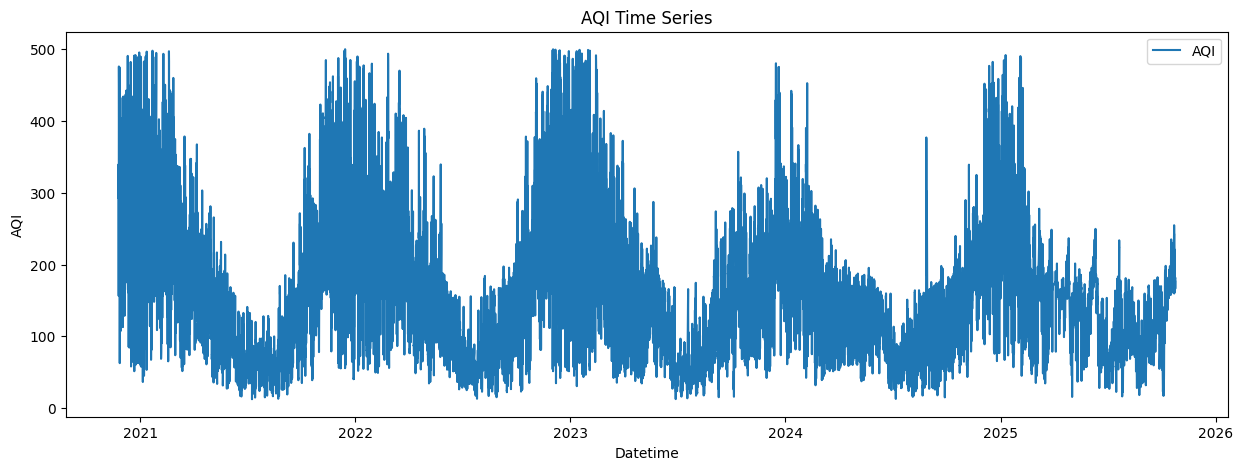

<Figure size 1500x500 with 0 Axes>

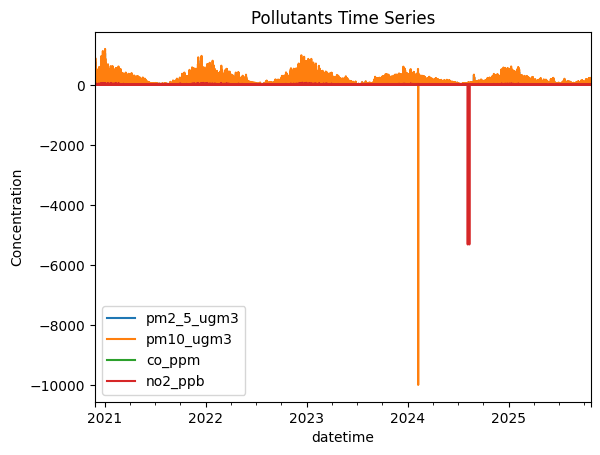

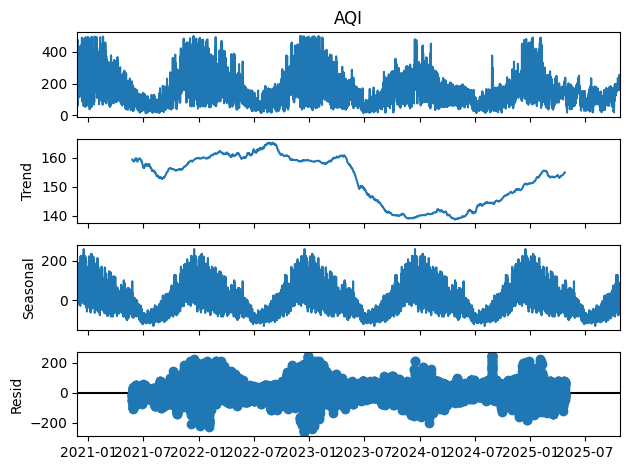

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("final_with_aqi.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Example: Plot AQI over time
plt.figure(figsize=(15,5))
plt.plot(df.index, df['AQI'], label='AQI')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.title('AQI Time Series')
plt.legend()
plt.show()

# Example: Plot multiple pollutants
plt.figure(figsize=(15,5))
df[['pm2_5_ugm3','pm10_ugm3','co_ppm','no2_ppb']].plot()
plt.title('Pollutants Time Series')
plt.ylabel('Concentration')
plt.show()

# Optional: Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['AQI'], model='additive', period=24*365) # yearly seasonality
result.plot()
plt.show()


In [ ]:
# Load CSV
df = pd.read_csv("final_with_aqi.csv")

# Exclude datetime column from check
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Find all negative values
negatives = (df[numeric_cols] < 0)

# Total negative values per column
neg_count = negatives.sum()
print("Negative values per column:")
print(neg_count)

# Total number of negative values in entire dataset
total_neg = neg_count.sum()
print("\nTotal negative values in dataset:", total_neg)

# Rows containing at least one negative value
rows_with_neg = df[negatives.any(axis=1)]
print("\nRows with negative values:")
print(rows_with_neg)

Negative values per column:
temperature_2m          0
relative_humidity_2m    0
surface_pressure        0
pressure_msl            0
precipitation           0
cloudcover              0
windspeed_10m           0
direct_radiation        0
co_ppm                  0
no2_ppb                 2
so2_ppb                 0
o3_ppm                  1
pm2_5_ugm3              0
pm10_ugm3               1
AQI                     0
dtype: int64

Total negative values in dataset: 4

Rows with negative values:
                  datetime  temperature_2m  relative_humidity_2m  \
23358  2023-07-26 07:00:00            22.2                    88   
28078  2024-02-07 23:00:00             5.9                    94   
32378  2024-08-05 03:00:00            20.8                    99   
32519  2024-08-11 00:00:00            20.9                    97   

       surface_pressure  pressure_msl  precipitation  cloudcover  \
23358             870.7        1010.0            0.0         100   
28078             868.6    

In [ ]:
# Load CSV
df = pd.read_csv("final_with_aqi.csv")

# Convert datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Replace all negative numeric values with NaN
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].mask(df[numeric_cols] < 0, other=pd.NA)

# Interpolate missing values (time-based)
df = df.interpolate(method='time')

# Optional: Reset index if needed
df = df.reset_index()

# Save cleaned dataset
df.to_csv("final_cleaned_interpolated.csv", index=False)

print("Negative values replaced with NaN and interpolated. Dataset cleaned.")

Negative values replaced with NaN and interpolated. Dataset cleaned.


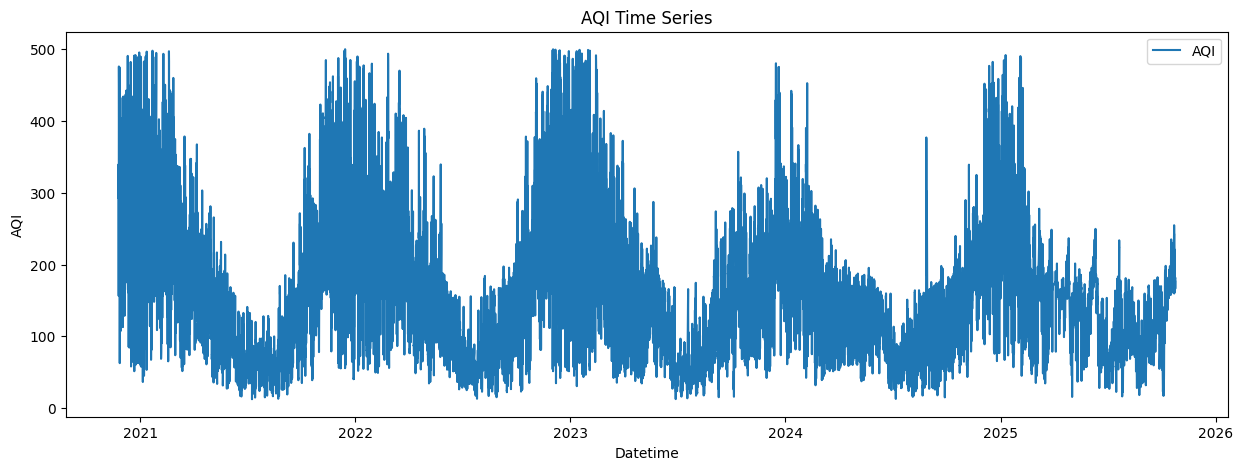

<Figure size 1500x500 with 0 Axes>

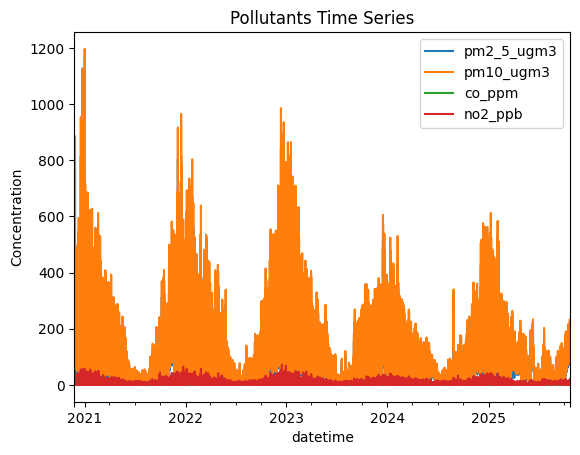

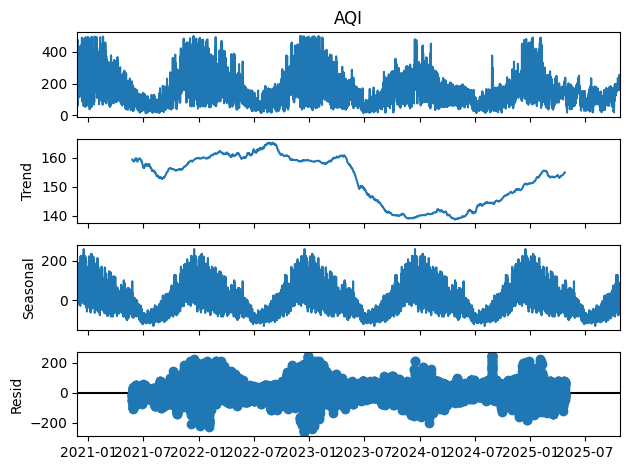

In [ ]:
# Load dataset
df = pd.read_csv("final_cleaned_interpolated.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Example: Plot AQI over time
plt.figure(figsize=(15,5))
plt.plot(df.index, df['AQI'], label='AQI')
plt.xlabel('Datetime')
plt.ylabel('AQI')
plt.title('AQI Time Series')
plt.legend()
plt.show()

# Example: Plot multiple pollutants
plt.figure(figsize=(15,5))
df[['pm2_5_ugm3','pm10_ugm3','co_ppm','no2_ppb']].plot()
plt.title('Pollutants Time Series')
plt.ylabel('Concentration')
plt.show()

# Optional: Seasonal decomposition
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df['AQI'], model='additive', period=24*365) # yearly seasonality
result.plot()
plt.show()

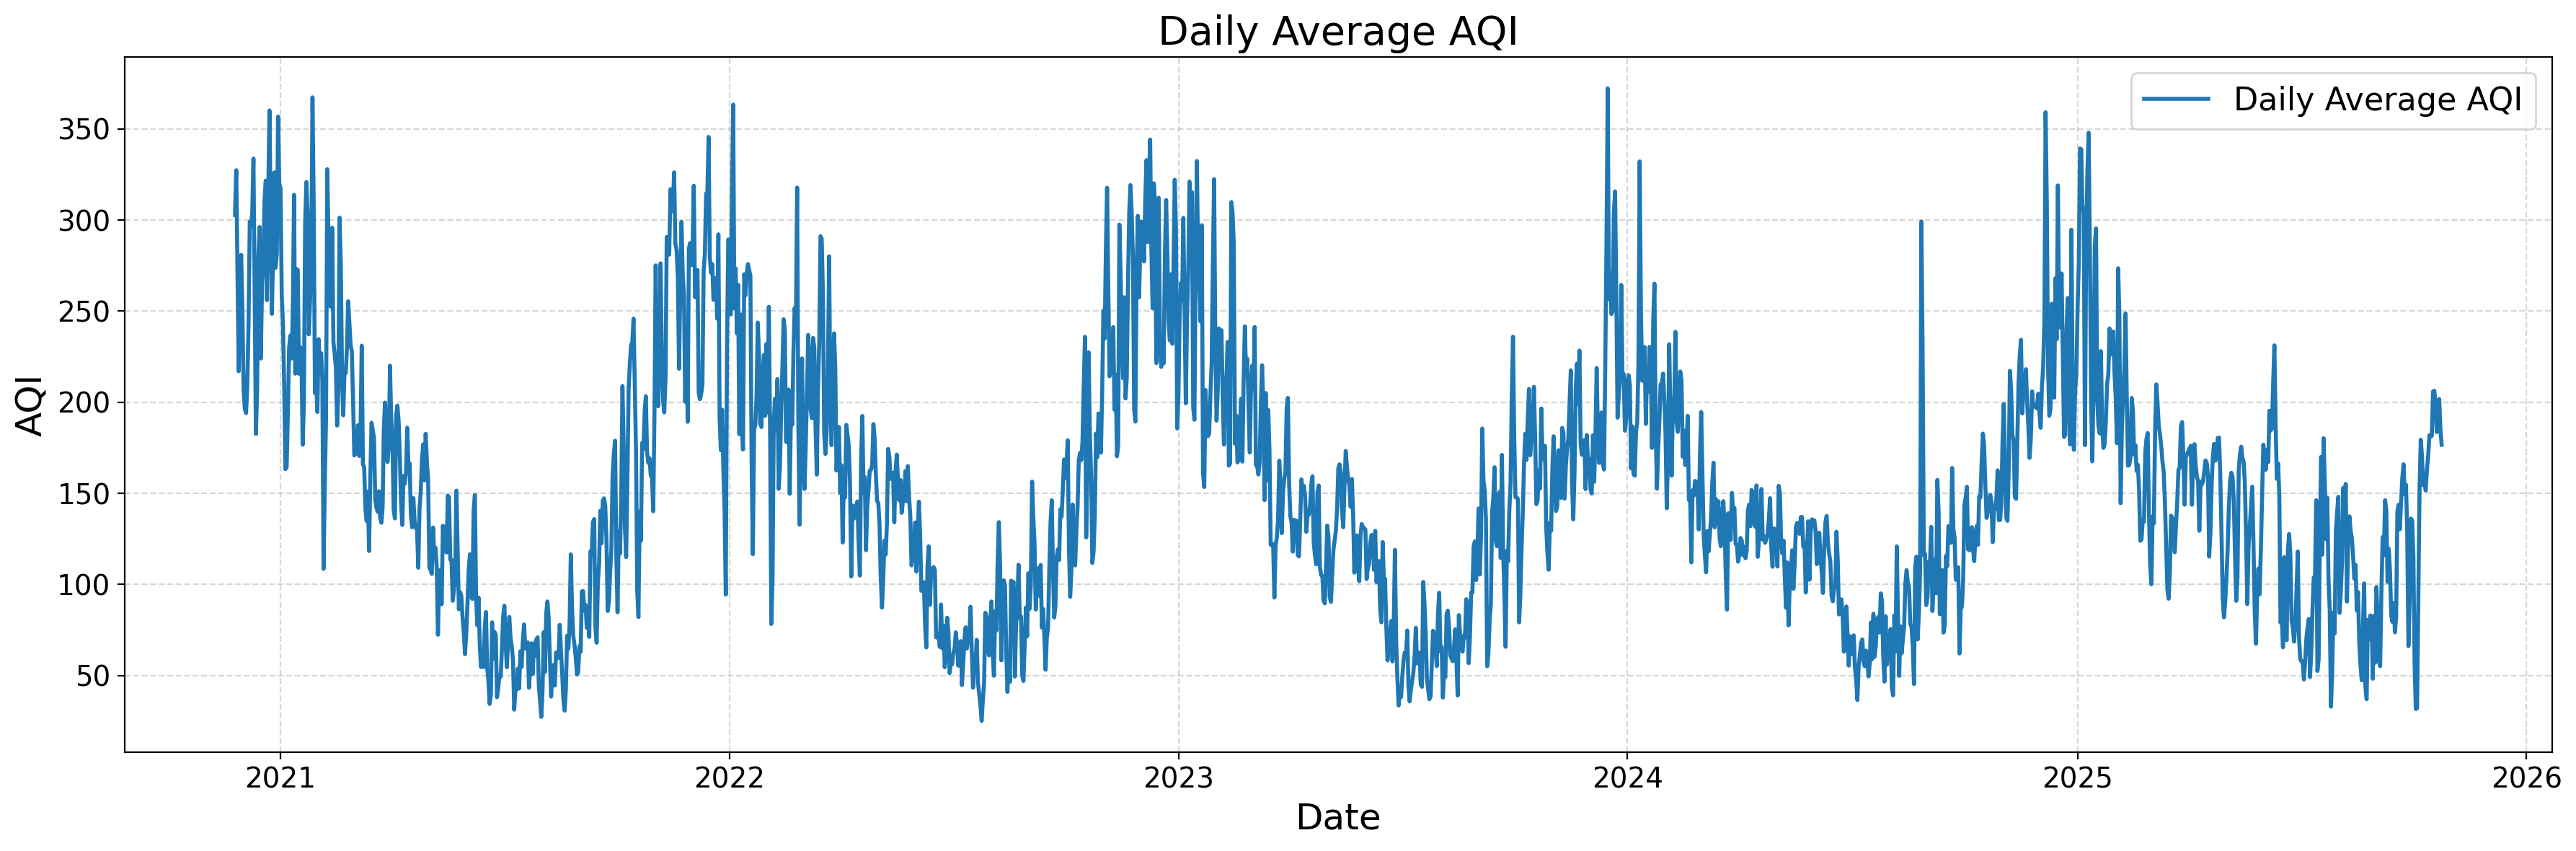

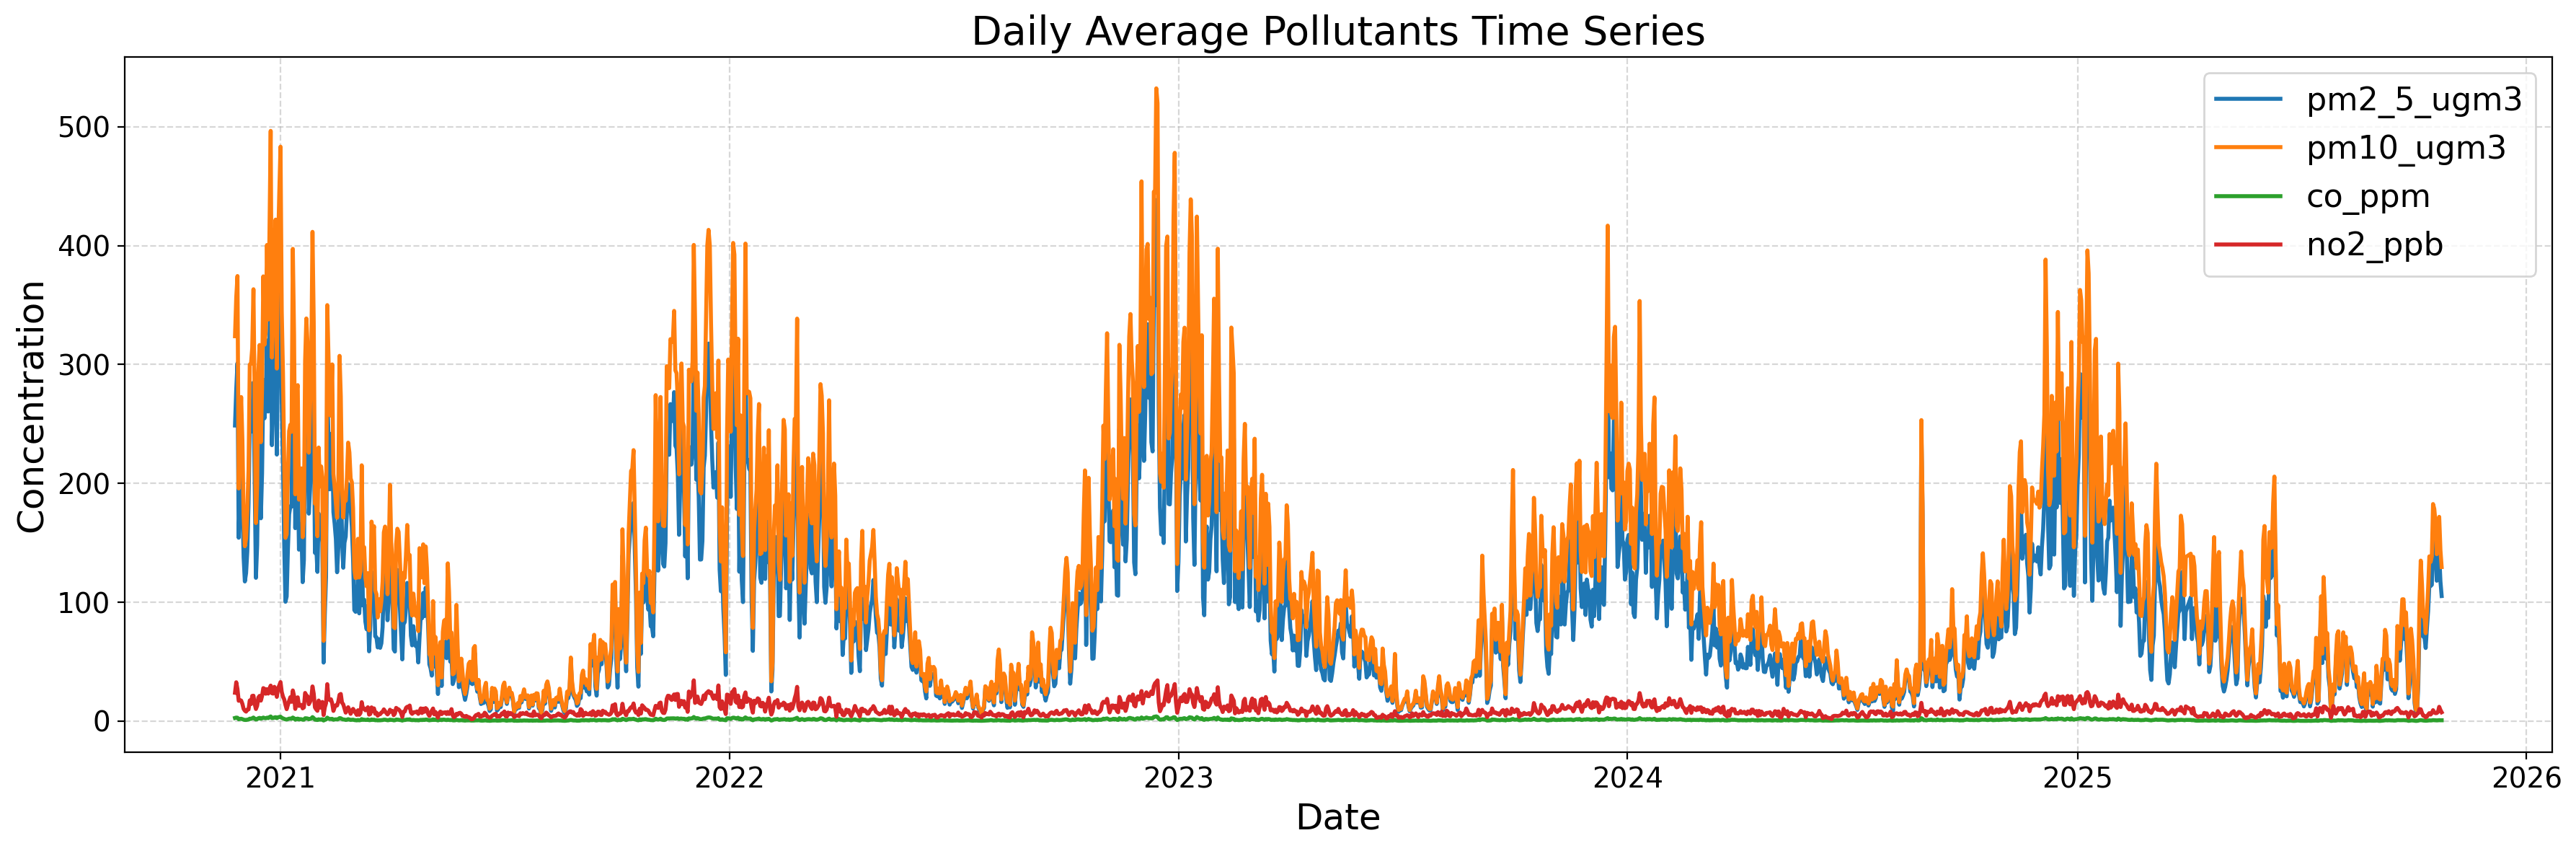

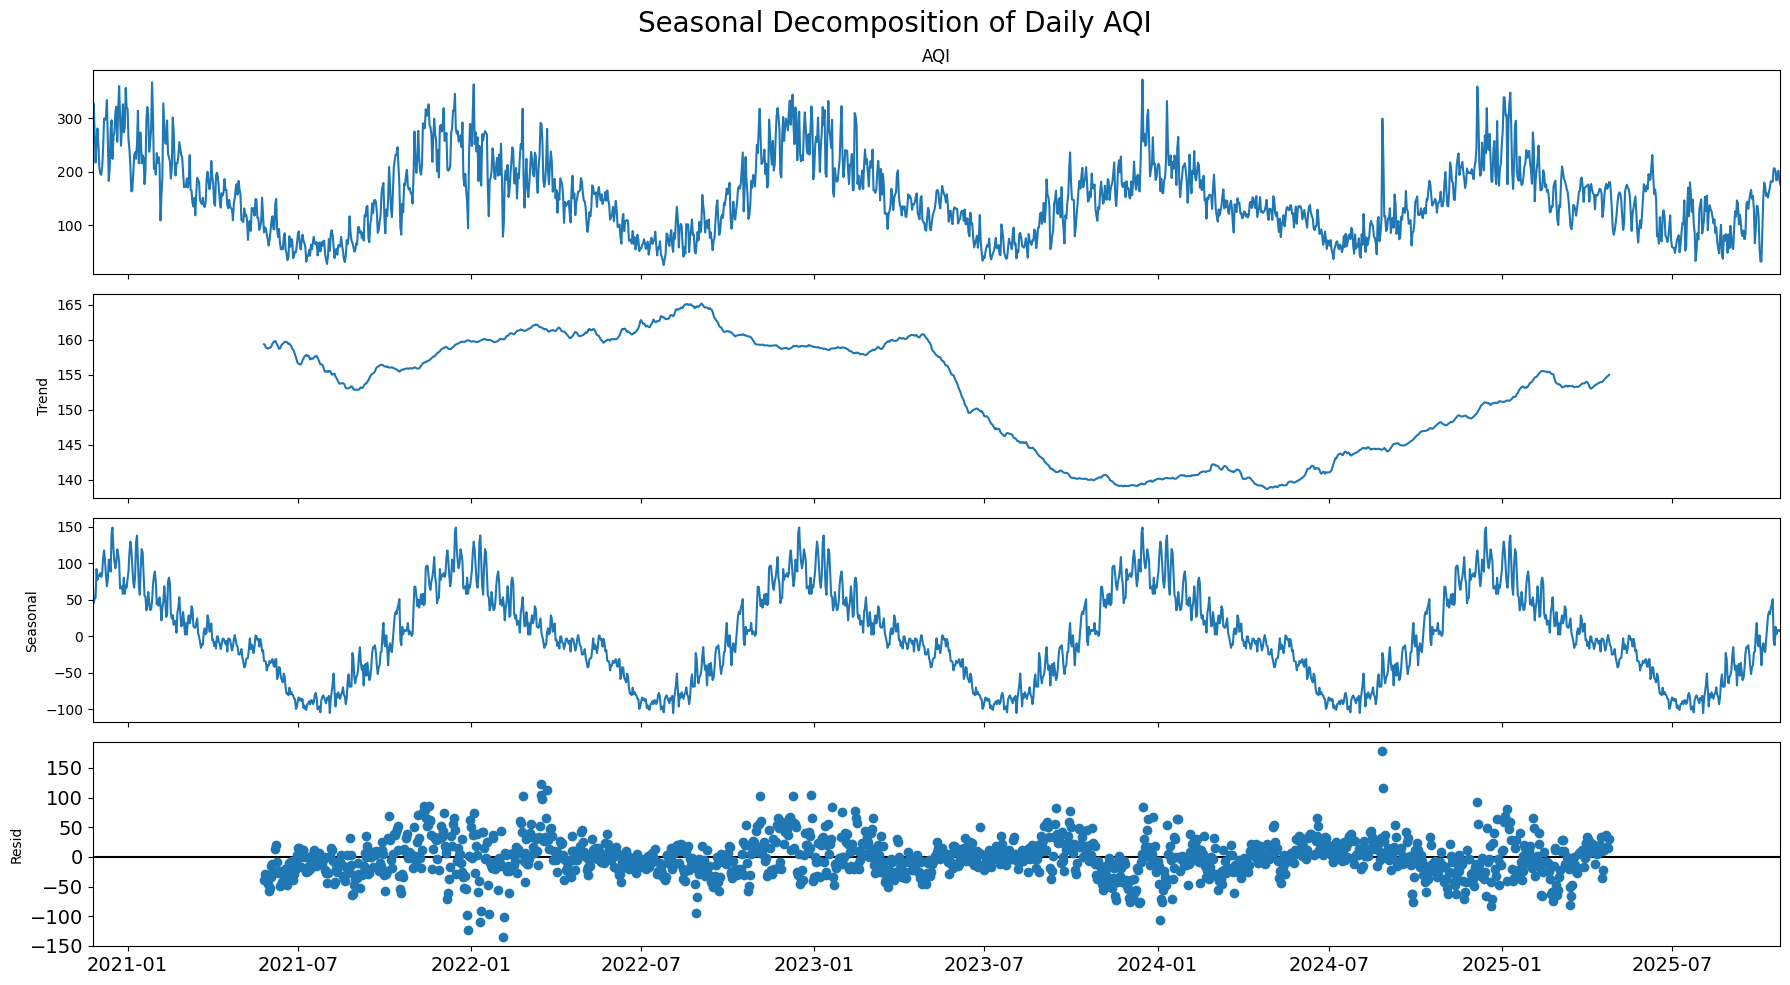

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Load dataset
df = pd.read_csv("final_cleaned_interpolated.csv")
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime')

# Resample daily
daily_avg = df.resample('D').mean()

# ------------------------------
# Plot daily average AQI (separate figure)
# ------------------------------
plt.figure(figsize=(18,6), dpi=200)
plt.plot(daily_avg.index, daily_avg['AQI'], label='Daily Average AQI', color='tab:blue', linewidth=2)
plt.xlabel('Date', fontsize=18)
plt.ylabel('AQI', fontsize=18)
plt.title('Daily Average AQI', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

# ------------------------------
# Plot daily average pollutants (separate figure)
# ------------------------------
plt.figure(figsize=(18,6), dpi=200)
for col, color in zip(['pm2_5_ugm3','pm10_ugm3','co_ppm','no2_ppb'],
                      ['tab:red','tab:green','tab:orange','tab:purple']):
    plt.plot(daily_avg.index, daily_avg[col], label=col, linewidth=2)

plt.xlabel('Date', fontsize=18)
plt.ylabel('Concentration', fontsize=18)
plt.title('Daily Average Pollutants Time Series', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()

# ------------------------------
# Seasonal decomposition of daily AQI (yearly trend)
# ------------------------------
result = seasonal_decompose(daily_avg['AQI'], model='additive', period=365)
fig = result.plot()
fig.set_size_inches(18, 10)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.suptitle('Seasonal Decomposition of Daily AQI', fontsize=20)
plt.tight_layout()
plt.show()


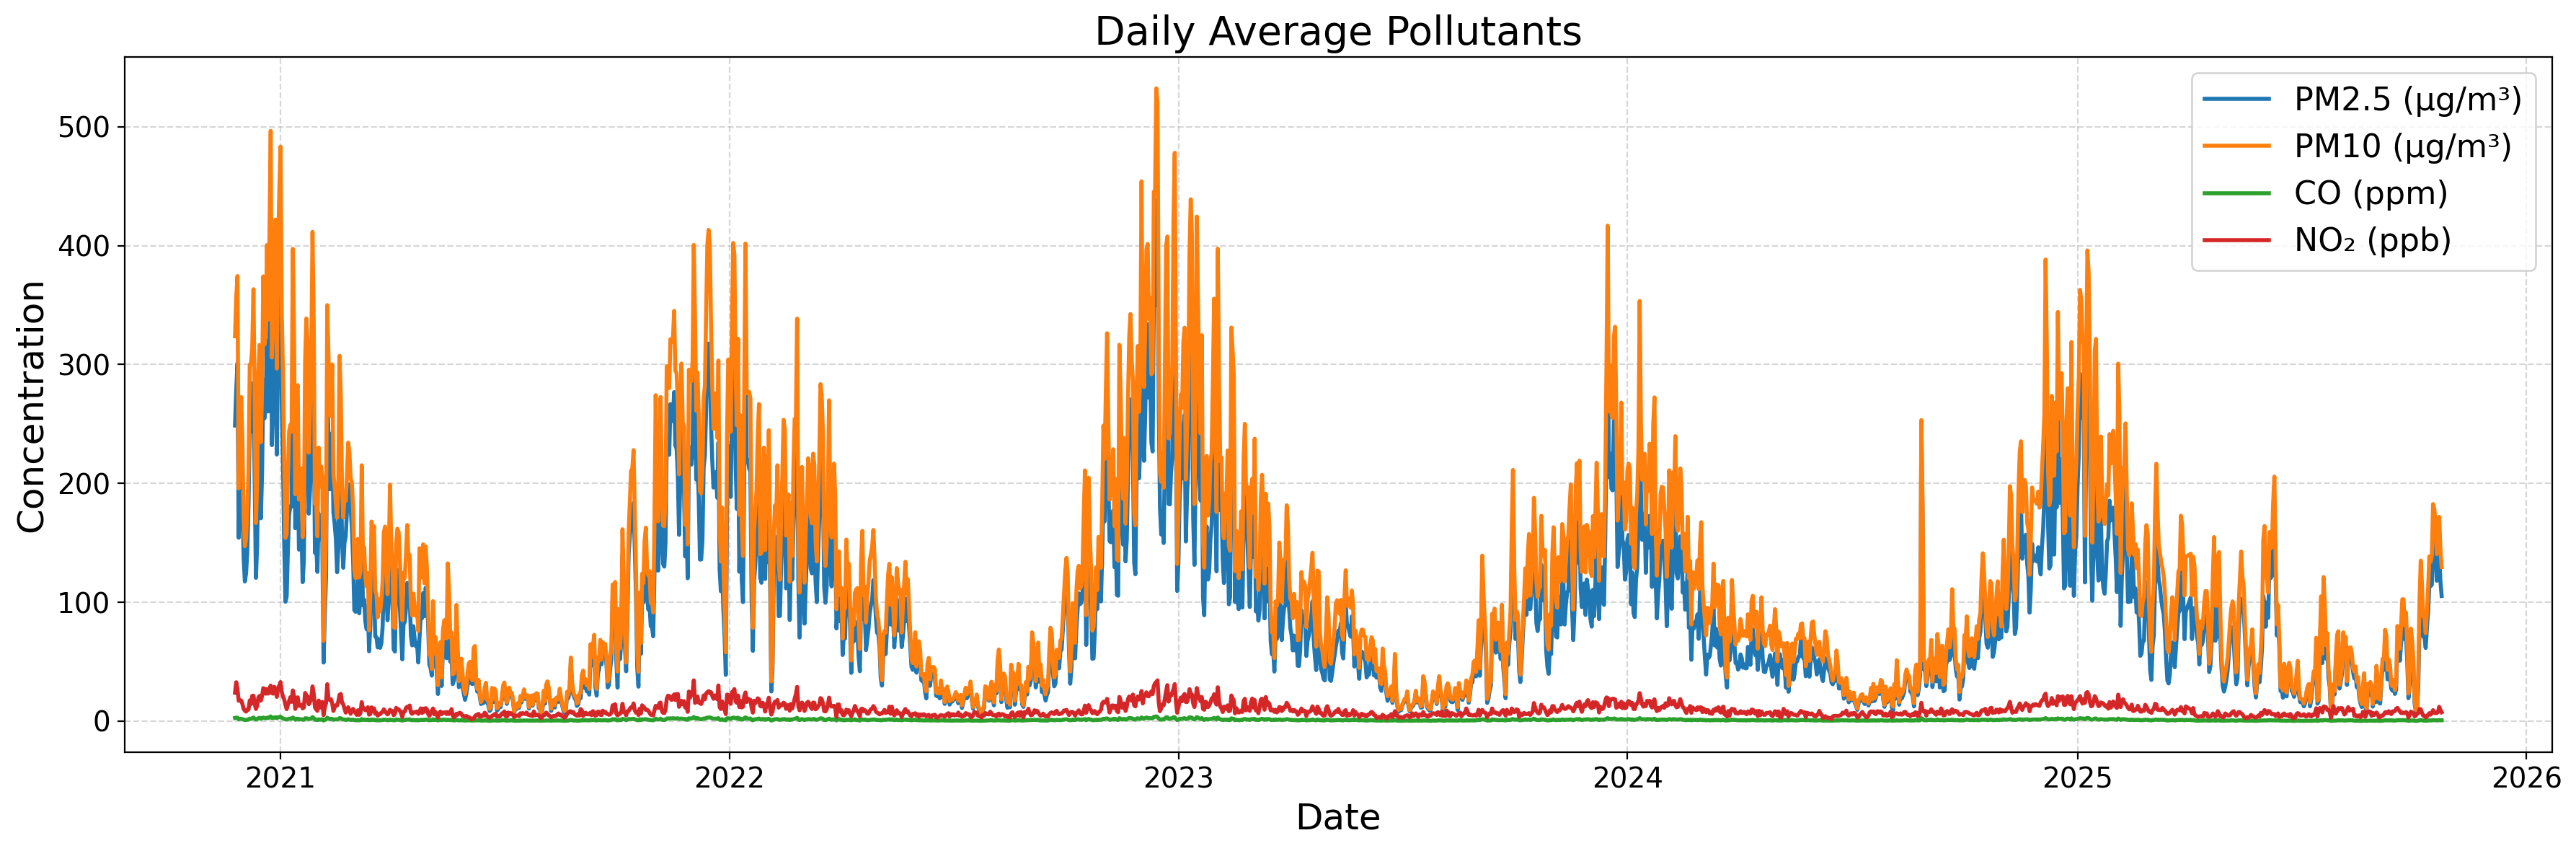

In [ ]:
# ------------------------------
# Human-readable labels
# ------------------------------
label_map = {
    'pm2_5_ugm3': 'PM2.5 (µg/m³)',
    'pm10_ugm3': 'PM10 (µg/m³)',
    'co_ppm': 'CO (ppm)',
    'no2_ppb': 'NO₂ (ppb)'
}

# ------------------------------
# Plot daily average pollutants (separate figure)
# ------------------------------
plt.figure(figsize=(18,6), dpi=200)

for col, color in zip(
    ['pm2_5_ugm3','pm10_ugm3','co_ppm','no2_ppb'],
    ['tab:red','tab:green','tab:orange','tab:purple']
):
    plt.plot(
        daily_avg.index,
        daily_avg[col],
        label=label_map[col],   # <<< Use readable label here
        linewidth=2
    )

plt.xlabel('Date', fontsize=18)
plt.ylabel('Concentration', fontsize=18)
plt.title('Daily Average Pollutants', fontsize=20)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(fontsize=16)
plt.tight_layout()
plt.show()
